# unn

unn is my reference implementation of a very simple neural network capable of recognizing handwritten digits. It has been coded completely from scratch using only the excelent numerical computation library [NumPy](https://numpy.org/).

During the implementation process, I have relied hevily on Michael Nielsen's fantastic book called [Neural Networks and Deep Learning](http://neuralnetworksanddeeplearning.com/index.html) and I have used his own reference implementation available in the book to test and evaluate my codebase.

In [1]:
import random

import matplotlib.pyplot as plt

import unn.mnist
import unn.neuralnet

In [2]:
def prediction(vector):
    value = 0
    confidence = 0

    for v, c in enumerate(vector):
        c = c[0]
        if c > confidence:
            value = v
            confidence = c

    return value, confidence


def to_image(sample):
    return sample.reshape(28, 28)

## The MNIST Dataset

I'm using the MNIST dataset throughout the whole training and evaluation process. The custom utility function `unn.mnist.load_dataset` depends on two separate data files - a raw uncompressed pixel data of handwritten digits and another file comprising of labels for the images. The dataset is divided into 50k samples data samples for training and 10k data samples to be used for model evaluation purposes. This partitioning into two separate segments is essential for the model to be properly evaluated on data points it had not seen during the training process.

In [3]:
training_data = unn.mnist.load_dataset(
    "./data/train-images-idx3-ubyte.gz",
    "./data/train-labels-idx1-ubyte.gz"
)

test_data = unn.mnist.load_dataset(
    "./data/t10k-images-idx3-ubyte.gz",
    "./data/t10k-labels-idx1-ubyte.gz"
)

Following is a simple visual demonstration of the MNIST dataset. You can repeatedly run the kernel below to randomly browse through the 28x28 greyscale images.

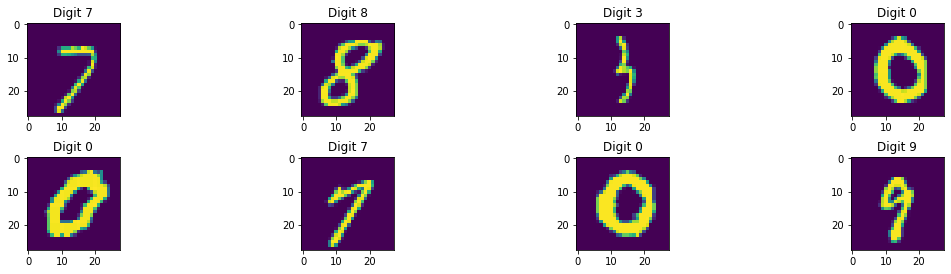

In [4]:
training_data_length = len(training_data)

rows = 2
columns = 4
size = 16

fig, axes = plt.subplots(rows, columns)
fig.tight_layout(pad=2)
fig.set_figwidth(size)

for row in range(rows):
    for column in range(columns):
        axis = axes[row][column]
        index = random.randrange(0, training_data_length)
        x, y = training_data[index]
        
        image = to_image(training_data[index][0])
        truth, _ = prediction(y)
        
        axis.set_title(f"Digit {truth}")
        axis.imshow(image)

## Training the Neural Network

The easiest neural network model I used comprises of three neuron layers, each using the [sigmoid function](https://en.wikipedia.org/wiki/Sigmoid_function) as an activation function. The input layer is built from 784 neurons to account for the 28x28 image dimensions. There's a second hidden layer of 30 neurons and lastly, the output layer is made up of 10 output neurons.

The training process uses an algorithm called [stochastic gradient descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) to evaluate current learning state of the neural network and update its weights and biases in the most practical and efficient way.

Since I am using NumPy to do all the number crunching and heavy-lifting, the learning process itself takes about 15 minutes on my Intel Core i7 laptop with 16GB RAM.

Feel free to train the neural network from scratch for yourself.

Text(0, 0.5, 'Error')

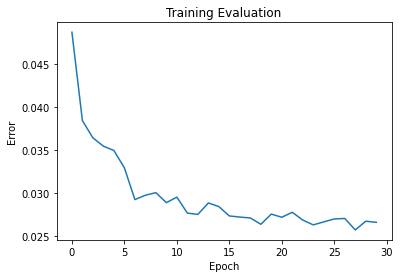

In [5]:
net = unn.neuralnet.Neuralnet((784, 30, 10))

epochs = 30
batch_size = 10
learning_rate = 3.0

evaluation = unn.neuralnet.train(
    net,
    training_data,
    epochs,
    batch_size,
    learning_rate,
    test_data=test_data
)

plt.plot(evaluation)
plt.title("Training Evaluation")
plt.xlabel("Epoch")
plt.ylabel("Error")

## The Result

Below is a kernel that lets you randomly pick an image from the test dataset and feeds it through the trained neural network.

As you can see, the prediction confidence of the trained model hits consistently around 97%.

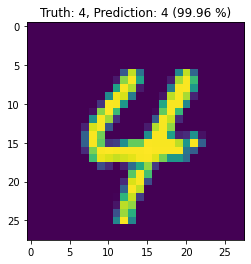

In [6]:
x, y = random.choice(test_data)
z = net.feedforward(x)

truth, _ = prediction(y)
value, confidence = prediction(z)

plt.title(f"Truth: {truth}, Prediction: {value} ({confidence * 100:.2f} %)")
plt.imshow(to_image(x))